# My First Jupyter Notebook🎉
感谢ChatGPT妈妈的悉心指导，我终于搞定了前期的anaconda的下载和配置工作

**✅ 快捷键：切换回 Python 代码/Markdown单元的方法**

| 操作方式 | 快捷键（命令模式下） | 说明 |
| --- | --- | --- |
| 切换为代码单元 | `Y` | 将当前单元变为 Code（代码） |
| 切换为 Markdown 单元 | `M` | 将当前单元变为 Markdown |
| 插入新代码单元（自动是代码） | `B` 或 `A` 然后按 `Y` | 插入单元后立即按 `Y` 切换为代码 |

---

**🔁 命令模式 与 编辑模式说明**

- **命令模式**（外框蓝色）：按 `Esc` 进入  
- **编辑模式**（外框绿色，光标闪烁）：按 `Enter` 进入  

你需要在 **命令模式下** 才能用 `Y`、`M` 这类快捷键。


## 代码

In [4]:
def greet(name):
    return f"你好，{name}！欢迎使用 Jupyter Notebook 🎈"

In [5]:
greet("小茗")

'你好，小茗！欢迎使用 Jupyter Notebook 🎈'

## 画图

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体
rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题
"""
rcParams['font.sans-serif'] = ['SimSun']  # 宋体
rcParams['font.sans-serif'] = ['KaiTi']   # 楷体
rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
注意：字体名称必须和你电脑上字体库名称完全一致，否则 matplotlib 找不到就会回退成默认字体。
"""

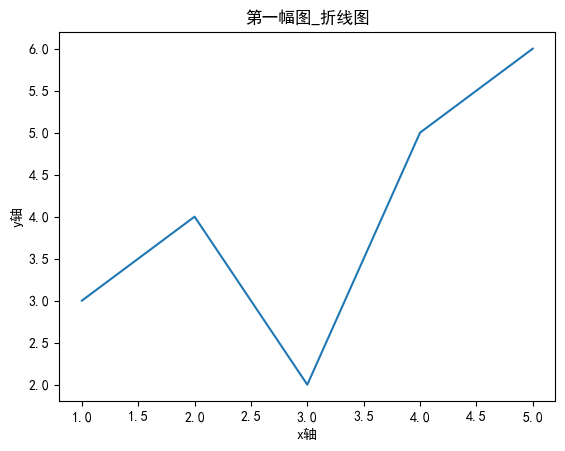

In [7]:
x=[1,2,3,4,5]
y=[3,4,2,5,6]
plt.plot(x,y)
plt.title("第一幅图_折线图")
plt.xlabel("x轴")
plt.ylabel("y轴")
plt.show()

## 读入Excel文件

In [7]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)


In [9]:
import pandas as pd
df = pd.read_excel('D:/PKU/Grade1rd/Other/Class Schedule.xls', sheet_name='new sheet')
print(df.columns)

Index(['节数', '星期一', '星期二', '星期三', '星期四', '星期五', '星期六', '星期日'], dtype='object')


## 机器学习
### 鸢尾花KNN案例

In [10]:
!pip install scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
加载鸢尾花数据

In [11]:
from sklearn.datasets import load_iris
import pandas as pd

# 加载数据集
iris = load_iris()

# 用 pandas 显示为表格形式
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # 添加标签列
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


数据可视化

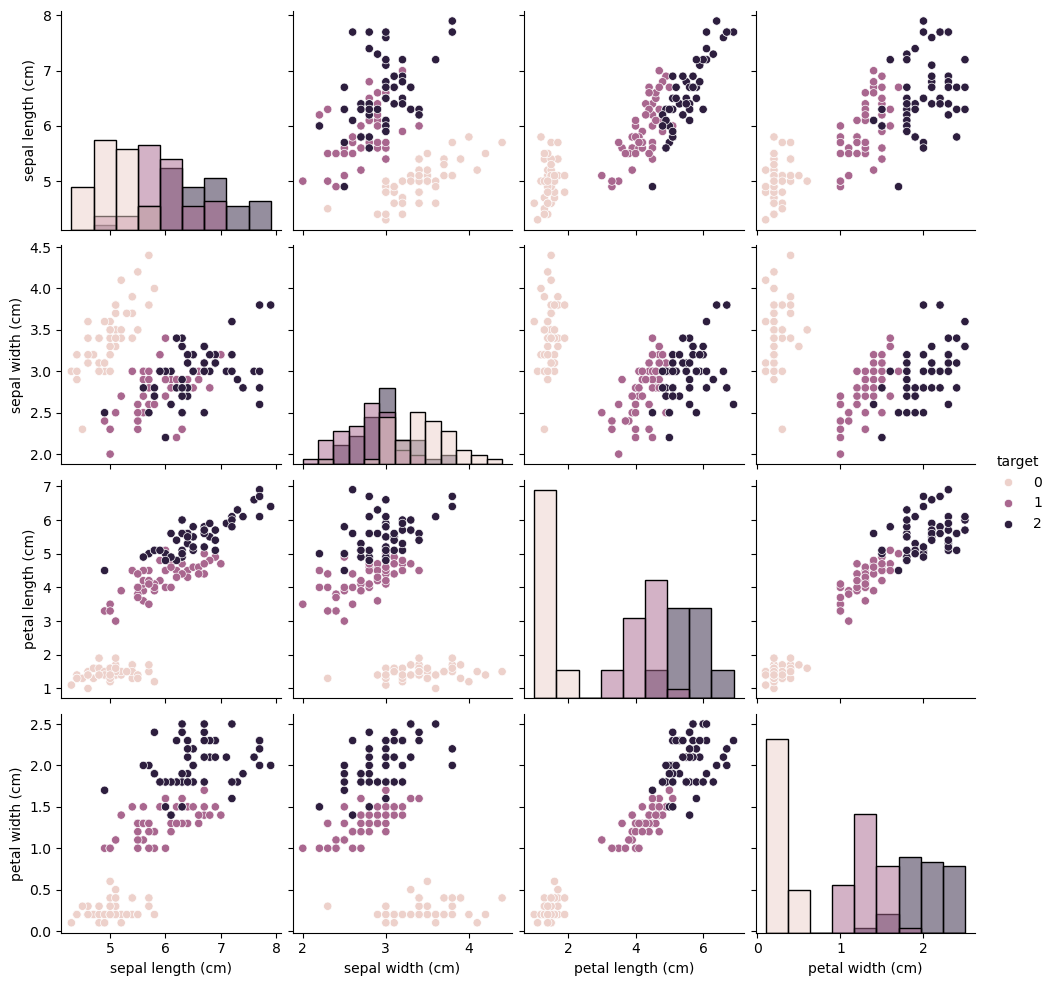

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

训练模型：KNN分类器
- 🧠 什么是 KNN 算法？
KNN 是“K个最近邻”（K-Nearest Neighbors）的缩写。

- 核心思想是
“一个样本的类别，取决于它在特征空间中距离它最近的 K（这里k=3）个样本中，哪个类别出现得最多。”

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 准备训练数据和标签
X = iris.data
y = iris.target

# 分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建模型
knn = KNeighborsClassifier(n_neighbors=3)

# 拟合模型
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

预测并评估模型

In [14]:
# 模型预测
y_pred = knn.predict(X_test)

# 评估准确率
from sklearn.metrics import accuracy_score

print("预测准确率：", accuracy_score(y_test, y_pred))

预测准确率： 1.0


- 代码解释  

| 代码                                    | 意义                                          |
| ------------------------------------- | ------------------------------------------- |
| `load_iris()`                         | 载入 sklearn 自带的鸢尾花数据集，共 150 条样本。             |
| `X = iris.data`                       | 提取特征数据，4个数值：花萼长、宽，花瓣长、宽。                    |
| `y = iris.target`                     | 提取对应标签（0=Setosa，1=Versicolour，2=Virginica）。 |
| `train_test_split(...)`               | 将数据随机分成训练集和测试集，一般比例是80/20。                  |
| `KNeighborsClassifier(n_neighbors=3)` | 创建一个 KNN 模型，设置 K=3。                         |
| `model.fit(X_train, y_train)`         | 让模型“学习”已有的训练数据。                             |
| `model.predict(X_test)`               | 用训练好的模型预测测试数据的标签。                           |
| `accuracy_score(...)`                 | 评估预测结果和真实标签之间有多少比例是一致的。                     |


### 手写数字KNN案例

数据集样本数量：1797


<Figure size 640x480 with 0 Axes>

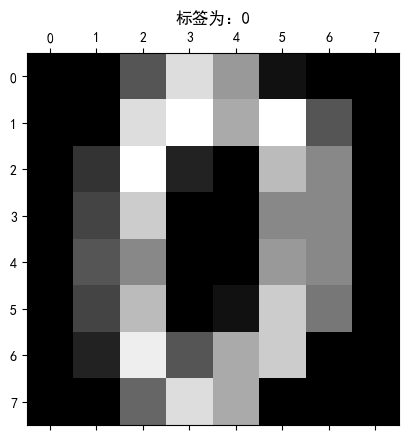

混淆矩阵：
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  1  1  0  0  0 37]]

分类报告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.97      0.93      0.95        40

    accuracy                           0.98       360
   mac

<Figure size 640x480 with 0 Axes>

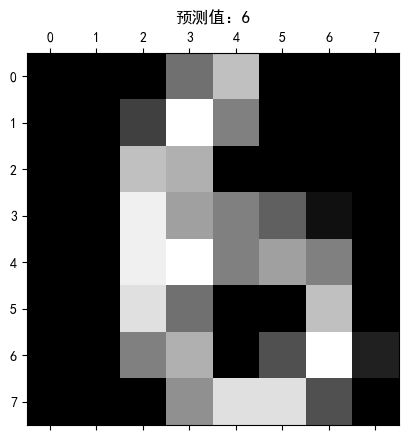

<Figure size 640x480 with 0 Axes>

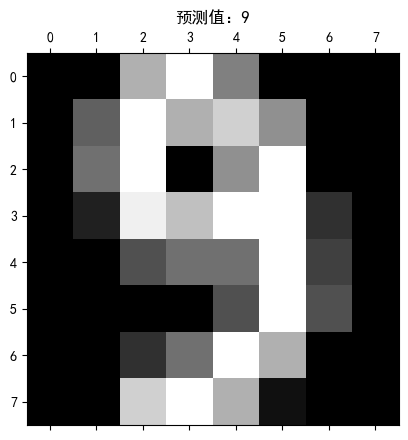

<Figure size 640x480 with 0 Axes>

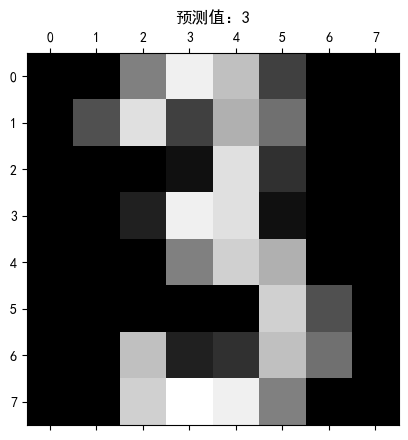

<Figure size 640x480 with 0 Axes>

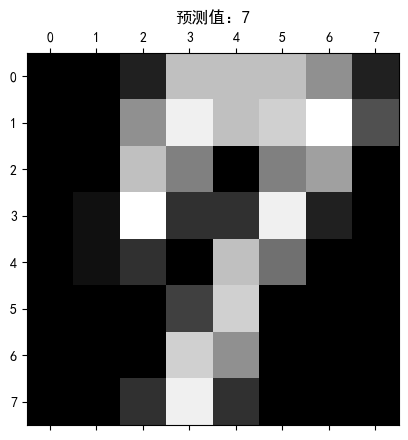

<Figure size 640x480 with 0 Axes>

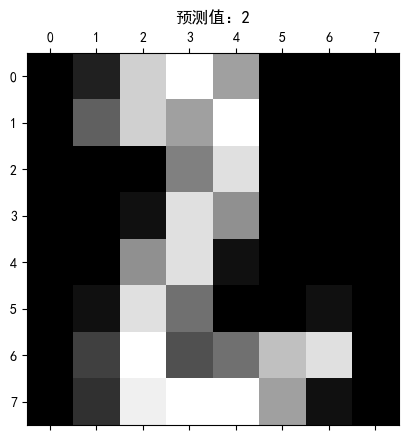

In [3]:
# 导入所需库
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体为黑体
rcParams['axes.unicode_minus'] = False    # 解决负号 '-' 显示为方块的问题

# 1. 加载数据集
digits = datasets.load_digits()
print(f"数据集样本数量：{len(digits.images)}")

# 2. 可视化其中一个数字
plt.gray()
plt.matshow(digits.images[0])  # 显示第0张图像
plt.title(f"标签为：{digits.target[0]}")
plt.show()

# 3. 数据预处理：将图像从 8x8 拉平成 64维特征向量
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# 4. 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 使用 KNN 进行训练
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# 6. 预测测试集
y_pred = model.predict(X_test)

# 7. 打印评估结果
print("混淆矩阵：")
print(confusion_matrix(y_test, y_pred))
print("\n分类报告：")
print(classification_report(y_test, y_pred))

# 8. 显示几张预测结果图
for index, (image, prediction) in enumerate(zip(X_test[:5], y_pred[:5])):
    plt.gray()
    plt.matshow(image.reshape(8, 8))
    plt.title(f"预测值：{prediction}")
    plt.show()


- 🔁 reshape 之后：  
  我们需要把它转换为一个一维向量，共有 8×8 = 64 个像素值：`(8, 8) → (64,)`  
  而对所有 1797 张图操作后就是：
`(1797, 8, 8) → (1797, 64)`

  ⚠️ -1 在 reshape 中表示“自动推断”。等价于：
`X = digits.images.reshape((1797, 64))`

- ✅ 为什么要拉平成一维:  
  因为后续要把这些图像数据 作为机器学习模型的输入特征，比如喂给 KNN、SVM、决策树等。  
  这些算法期望每个样本是一个一维向量（向量化数据），而不是二维的图像矩阵。

## 做一个小项目：词云生成器

In [5]:
!pip install wordcloud matplotlib jieba

Defaulting to user installation because normal site-packages is not writeable


1. 英文文本

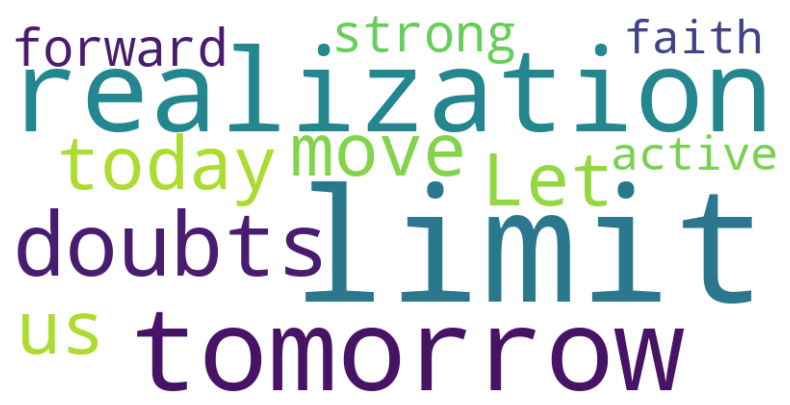

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 准备一段英文文本
text = """
The only limit to our realization of tomorrow is our doubts of today.
Let us move forward with strong and active faith.
"""

# 创建词云对象
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

👉 导入所需库

WordCloud 是词云生成类，用于将词频数据转化为图像。

matplotlib.pyplot 是画图工具，用来显示生成的词云图片。

👉 显示词云图

plt.figure() 设置显示窗口大小

plt.imshow() 将词云图像加载进图形窗口

interpolation='bilinear' 表示图像平滑显示

plt.axis('off') 隐藏坐标轴

plt.show() 显示图像

2. 中文文本

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\weiming\AppData\Local\Temp\jieba.cache
Loading model cost 0.540 seconds.
Prefix dict has been built successfully.


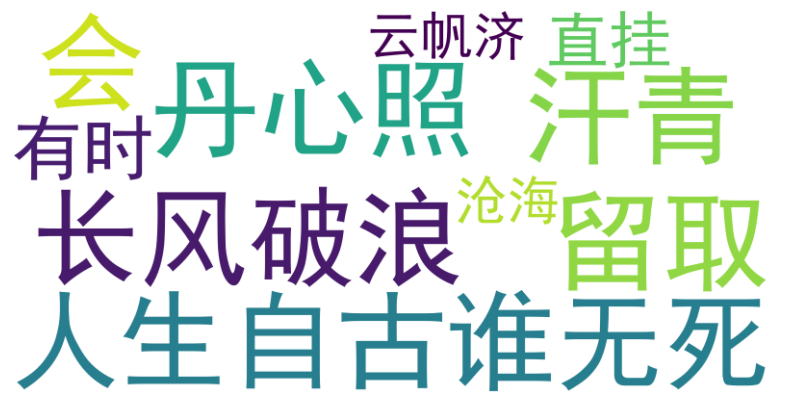

In [7]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 准备一段中文文本
text = "人生自古谁无死，留取丹心照汗青。长风破浪会有时，直挂云帆济沧海。"

# 使用jieba分词
cut_text = " ".join(jieba.cut(text))

# 创建词云对象（需要指定中文字体路径）
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/simhei.ttf",  # Windows系统下的黑体字体路径
    width=800, height=400, background_color='white'
).generate(cut_text)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

👉 中文要“分词”，即把连续的汉字按词切开，jieba 是常用的中文分词工具。

👉 使用 jieba.cut(text) 进行分词

输出结果类似于：['人生', '自古', '谁', '无', '死', '留取', '丹心', ...]

用 " ".join(...) 连接成字符串给词云使用（必须是用空格分隔的）